In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
i1 = np.array([76,
193,
230,
282,
342,
405,
476,
526,
580,
619,
674,
716,
761,
801])

u1 = np.array([
15,
34,
40,
47,
56,
66,
77,
85,
94,
100,
108,
115,
122,
129])

i2 = np.array([
61,
116,
198,
252,
298,
341,
384,
432,
491,
524,
573,
637,
709,
761,
801])

u2= np.array([7,
16,
29,
38,
45,
51,
59,
66,
75,
80,
88,
98,
110,
118,
124])

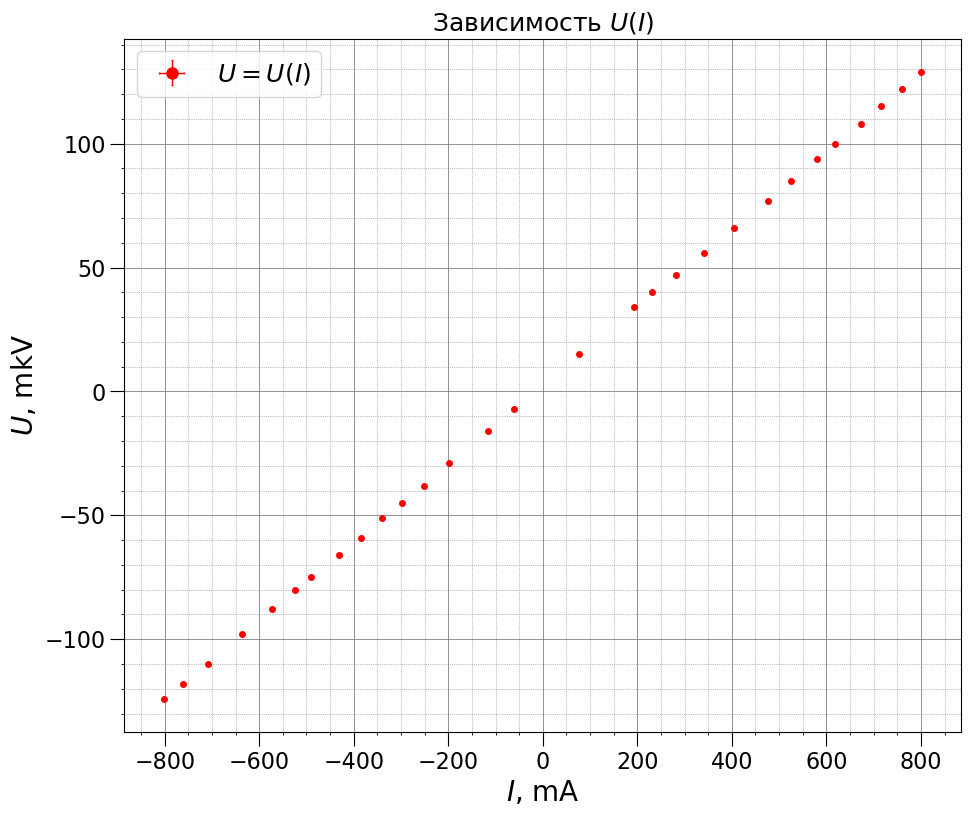

In [6]:
plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6, which='major')

plt.title('Зависимость $U(I)$', fontsize=18)
#plt.xlim(xmin=0, xmax=6)
#plt.ylim(ymin=0, ymax=19)
plt.xlabel('$I$, mA', fontsize=20, rotation=0,
           #ha='right'
          )
plt.ylabel('$U$, mkV', fontsize=20, rotation = 90, )
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(True, linestyle='-', linewidth=0.6, color='gray')
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.gca().minorticks_on()
# Включение более мелкой сетки
plt.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5, color='gray')

yerr_1 = 0.005
xerr_1 = 0.005
a=np.linspace(0,100, 100)

plt.errorbar(
    i1,
    u1,
    fmt='ro',
    linewidth=1,
    markersize=4,
    elinewidth=1,
    label='$U=U(I)$',
    xerr=xerr_1 *i1,
    yerr=yerr_1*u1,
    capsize=1
)

plt.errorbar(
    -i2,
    -u2,
    fmt='ro',
    linewidth=1,
    markersize=4,
    elinewidth=1,
    #label='$U=U(I)$',
    xerr=xerr_1 *i2,
    yerr=yerr_1*u2,
    capsize=1
)
# z = np.polyfit(lpb, np.log(n_0/npb), deg=1)
# polynom_1 = np.poly1d(z)
# plt.plot(a, polynom_1(a),"k--", linewidth=1, 
#          #label="МНК"
#         )


plt.legend(fontsize=18, markerscale = 2)
plt.show()

plot_1.savefig(
    'U(I).pdf',
    format='pdf',
    bbox_inches='tight',
    #pad_inches=4
)

In [10]:
x = np.concatenate((i1,-i2))
y = np.concatenate((u1,-u2))

# Вычисляем необходимые суммы
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

# Вычисляем коэффициенты наклона и свободного члена
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b = (sum_y - m * sum_x) / n

print("Коэффициент наклона (slope):", m)
print("Свободный член (intercept):", b)

# Вычисляем коэффициенты линейной регрессии
coeff = np.polyfit(x, y, 1)

# Расчет стандартных ошибок
y_pred = np.polyval(coeff, x)
SE_k = np.sqrt(np.sum((y - y_pred)**2) / ((len(x)-2) * np.sum((x - np.mean(x))**2)))
SE_b = SE_k * np.sqrt(np.mean(x**2))
SE_slope = SE_k

# Выводим результаты
print("Погрешность определения коэф. наклона (SE_slope):", SE_slope)
print("Погрешность определения коэф. смещения (SE_intercept):", SE_b)

# Расчет коэффициента корреляции
r = np.corrcoef(x, y)[0, 1]

# Вывод результата
print("Коэффициент корреляции (r):", np.abs(r))


Коэффициент наклона (slope): 0.15777324237904422
Свободный член (intercept): 2.3361846908606365
Погрешность определения коэф. наклона (SE_slope): 0.00018468001438652358
Погрешность определения коэф. смещения (SE_intercept): 0.09391302931964948
Коэффициент корреляции (r): 0.99998150327598


In [11]:
p=np.array([150,
352,
400,
450,
500,
897])

t = np.array([4.18604651162791,
5.88372093023256,
6.30232558139535,
9.09302325581395,
11.4186046511628,
14.4186046511628])

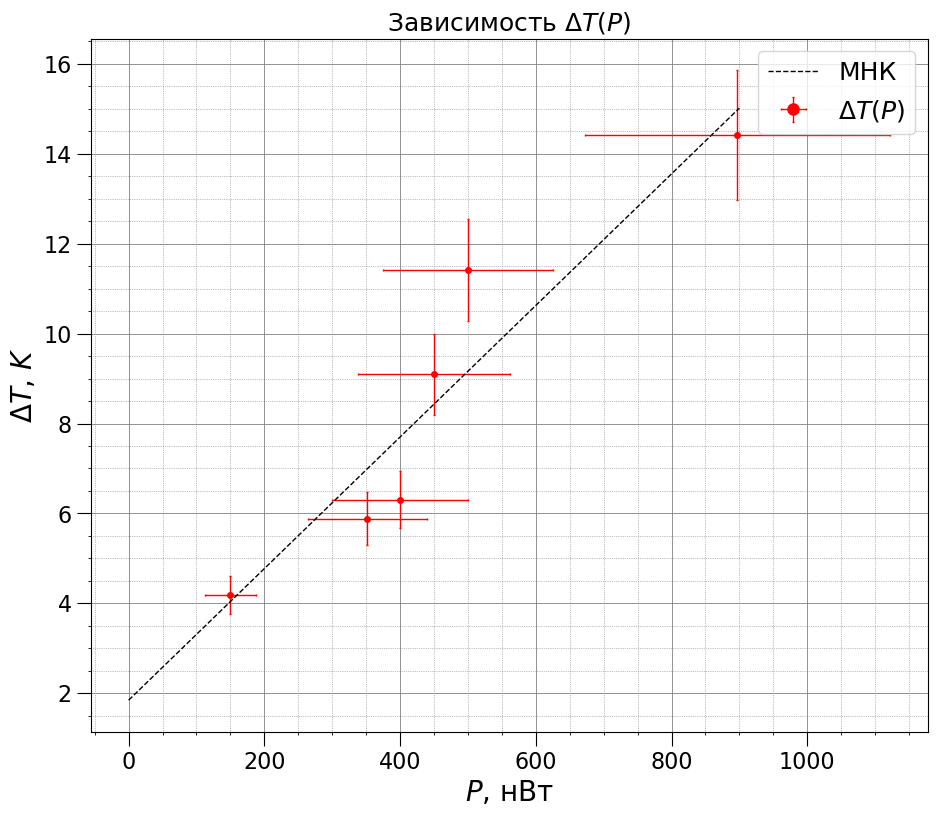

In [20]:
plot_2 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6, which='major')

plt.title('Зависимость $\Delta T(P)$', fontsize=18)
#plt.xlim(xmin=0, xmax=6)
#plt.ylim(ymin=0, ymax=19)
plt.xlabel('$P$, нВт', fontsize=20, rotation=0,
           #ha='right'
          )
plt.ylabel('$\Delta T$, $K$', fontsize=20, rotation = 90, )
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(True, linestyle='-', linewidth=0.6, color='gray')
plt.tick_params(axis='both', which='minor', labelsize=1)
plt.gca().minorticks_on()
# Включение более мелкой сетки
plt.grid(True, which='minor', axis='both', linestyle=':', linewidth=0.5, color='gray')

yerr_1 = 0.1
xerr_1 = 0.25
a=np.linspace(0,900, 10)

plt.errorbar(
    p,
    t,
    fmt='ro',
    linewidth=1,
    markersize=4,
    elinewidth=1,
    label='$\Delta T(P)$',
    xerr=xerr_1 *p,
    yerr=yerr_1*t,
    capsize=1
)

z = np.polyfit(p, t, deg=1)
polynom_1 = np.poly1d(z)
plt.plot(a, polynom_1(a),"k--", linewidth=1, 
         label="МНК"
        )


plt.legend(fontsize=18, markerscale = 2)
plt.show()

plot_2.savefig(
    'T(P).pdf',
    format='pdf',
    bbox_inches='tight',
    #pad_inches=4
)

In [18]:
x = p
y = t

# Вычисляем необходимые суммы
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

# Вычисляем коэффициенты наклона и свободного члена
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b = (sum_y - m * sum_x) / n

print("Коэффициент наклона (slope):", m)
print("Свободный член (intercept):", b)

# Вычисляем коэффициенты линейной регрессии
coeff = np.polyfit(x, y, 1)

# Расчет стандартных ошибок
y_pred = np.polyval(coeff, x)
SE_k = np.sqrt(np.sum((y - y_pred)**2) / ((len(x)-2) * np.sum((x - np.mean(x))**2)))
SE_b = SE_k * np.sqrt(np.mean(x**2))
SE_slope = SE_k

# Выводим результаты
print("Погрешность определения коэф. наклона (SE_slope):", SE_slope)
print("Погрешность определения коэф. смещения (SE_intercept):", SE_b)

# Расчет коэффициента корреляции
r = np.corrcoef(x, y)[0, 1]

# Вывод результата
print("Коэффициент корреляции (r):", np.abs(r))



Коэффициент наклона (slope): 0.014636035547815977
Свободный член (intercept): 1.8446439767415417
Погрешность определения коэф. наклона (SE_slope): 0.0027273913534654735
Погрешность определения коэф. смещения (SE_intercept): 1.3922671698434848
Коэффициент корреляции (r): 0.9370372434917424
